In [6]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums

import numpy as np
import scipy.stats

import os
import fnmatch

In [21]:
def rotation_correction(position_data):
    alpha = (2.5) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[3] * np.sin(alpha)
    rot_position_data[3] = position_data[1] * np.sin(alpha) + position_data[3] * np.cos(alpha)
    return rot_position_data

In [22]:
def get_index (beacon_data, position_data):
    """get indexes of beacons and compare to positions """
    enum = list(np.arange(0,len(beacon_data [0]),1))
    index=[]
    beacon_times = np.array(beacon_data[0])
    for i in enum:
        index.append(np.abs(beacon_times[i]-np.array(position_data[0])).argmin() )
    return index ,enum

In [23]:
def position_before_beacon_trigger_beacon(seconds_back, beacon_data, position_data):
    """Take beacon data and retuns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[]
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        x_list.append((position_data[1][i-(seconds_back*100):i]))
        y_list.append((position_data[3][i-(seconds_back*100):i]))
        time_list.append((position_data[0][i-(seconds_back*100):i]))
        #print (beacon_data[4][e],beacon_data[5][e],beacon_data[1][e],beacon_data[3][e],position_data[1][i], position_data[2][i] )
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return norm_x,norm_y,norm_time

In [246]:
root3 = '//10.153.170.3/storage2/fabian/data/raw/FS03/Event_files_FS03/'
root4 = '//10.153.170.3/storage2/fabian/data/raw/FS04/Event_files_FS04/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
animal = '//10.153.170.3/storage2/fabian/data/raw/FS03/Event_files_FS03/'

FS03_position= pd.read_csv(root3+'position_20210312-172823.txt',sep=" ", header=None)
FS04_position = pd.read_csv(root4+'position_20210322-202458.txt',sep=" ", header=None)

FS03_beacon = pd.read_csv(root+'beacons_20210312-172823.txt',sep=" ", header=None)
FS04_beacon = pd.read_csv(root4+'beacons_20210322-202458.txt',sep=" ", header=None)

FS03_metadata = pd.read_csv(root+'metadata_20210312-172823.txt',sep=" ", header=None)

### First need to get position of rears: 

In [68]:
def Z_periods_list(positions): 
    high_list =[] 
    count = 0 
    for height in positions[3]: 
        #print(height)
        if height>.62:
            #(print('he is high'))
            high_list.append((positions[1][count],positions[3][count],positions[2][count])) 
        count +=1
        else:
            high_list.append(('NaN','NaN','NaN'))
        count +=1

    return high_list

SyntaxError: invalid syntax (<ipython-input-68-5bbdf02e7e07>, line 10)

In [69]:
Z_periods= Z_periods_list(FS03_position)
df = pd.DataFrame(Z_periods)
df.plot()
df[1]

0.31451283831196103
0.321790244548231
0.3298811416919603
0.33888491343283533
0.34834429399936884
0.3576563828424857
0.36682302942139833
0.376070475671315
0.3848019145610472
0.394082713475517
0.4045638444412772
0.4135159450872335
0.422549954050367
0.43103002307667526
0.43674264155669884
0.4417273398388942
0.44696170872367147
0.45232721356169453
0.4583234398583729
0.4645334440717631
0.47119166337572965
0.47741004739211124
0.48370668290226587
0.4888451418236481
0.49389183966233025
0.5727767111804566
0.5779201167864295
0.5832521343657993
0.5882741652070165
0.5941054430966376
0.5997871196513141
0.605457962418961
0.6116594006343109
0.6174068458679047
0.6238294788646684
he is high
0.6289187377124469
he is high
0.6352004614156825
he is high
0.6417682928883798
he is high
0.6487984826510508
he is high
0.6551657331826165
he is high
0.6619596979432048
he is high
0.668303166350837
he is high
0.6740332342195253
he is high
0.6805422122295033
he is high
0.6865240565098029
he is high
0.6926653658567732

1.6081240282798845
he is high
1.6057922827222886
he is high
1.6059959305883529
he is high
1.607215141782651
he is high
1.6080081165280982
he is high
1.6097381525638785
he is high
1.6099474136530232
he is high
1.6103720193881856
he is high
1.6075317274969407
he is high
1.6024435939055703
he is high
1.5951997662842212
he is high
1.5868168630298978
he is high
1.5767970924370163
he is high
1.5688100573870067
he is high
1.5612498001229849
he is high
1.556937383046847
he is high
1.5521618644572854
he is high
1.5483743646171786
he is high
1.5468899190283578
he is high
1.5453545164470979
he is high
1.5441847996130385
he is high
1.5416617966718358
he is high
1.5398244223903863
he is high
1.53728174191209
he is high
1.5356539754837715
he is high
1.535986962417881
he is high
1.5369450495173245
he is high
1.5366359525910602
he is high
1.5360929162989265
he is high
1.5351349191757162
he is high
1.5344511210898684
he is high
1.5328162268011263
he is high
1.5312263391597616
he is high
1.5288237044179

-0.07521817854537936
-0.07170400892409189
-0.06836685147067503
-0.06637287923362911
-0.06392240192516796
-0.0617002284698952
-0.05872370187116818
-0.054773060073243895
-0.050224963809130295
-0.04726731298572082
-0.04491228373538106
-0.042967111542522696
-0.04008809137693585
-0.0363790599765378
-0.03283489302583321
-0.02911378628554471
-0.026623805669569862
-0.026017004864886537
-0.027768924855973834
-0.030711211418163332
-0.03377493779506706
-0.03649717431538596
-0.03784223984227328
-0.03776605235060432
-0.037397721033137085
-0.03784103690007478
-0.03923943116490116
-0.04276126952064604
-0.046710447803566923
-0.04911682026881595
-0.05022784281838619
-0.049938529436085954
-0.04836318787357682
-0.04749091542676292
-0.04649718359575511
-0.04590412886649585
-0.04351435296966617
-0.04254108807163856
-0.041266523065604584
-0.03898009764943071
-0.036856943758351406
-0.03532912940802316
-0.03376331310685654
-0.03256875742205163
-0.03202126021559929
-0.029648128619927
-0.026255721390581452
-0.0

0.24079835297105306
0.24128966325692375
0.24092752778724505
0.2412369464833665
0.24080213936582776
0.24058110174878664
0.24040456772142213
0.2405696422289672
0.2409946144346993
0.24101823759839328
0.24176299598454842
0.24164250275474147
0.24245031367658312
0.24295368782440402
0.24322324690696817
0.24410443245722824
0.24482217184474975
0.2454605526254927
0.24469228839919377
0.24509551521005205
0.24478428494104787
0.24630202292040648
0.247958189657768
0.249689662549222
0.25086973793541056
0.252312977741218
0.25376193976376976
0.25508399432300166
0.25632591113552494
0.25846545319800573
0.2599818618694511
0.2592686982813916
0.25867556890713456
0.25852854381362567
0.25852366006591565
0.25914475632101563
0.2594115939217484
0.2594870275767104
0.25814437545442576
0.2578020001062486
0.25637550211229315
0.2552795534296178
0.2550669469395441
0.2550611904488134
0.25536114489764006
0.25455593950544314
0.2531434939042427
0.2515186297469434
0.25066238758355147
0.25006773348880357
0.24908741903983783


0.4962187271012347
0.4893100211421185
0.47864609515921847
0.470456519002476
0.4597120586098287
0.44954217961337994
0.43987199348697564
0.43231196839958286
0.42284913786674744
0.4128420669688222
0.4034255081865099
0.3952421402384584
0.38336141376399874
0.3738526997367521
0.3618376070007646
0.35169192844181146
0.3407563781207161
0.32952472749790906
0.31757989787183144
0.3078504008596295
0.2954030172421856
0.28559444111226734
0.27396640894928953
0.265914080469457
0.2559380917875907
0.2492446863940238
0.24234211222641577
0.2325503709559345
0.2242009492963269
0.21251053529733446
0.20318624522237602
0.19502270822503895
0.18455323662435708
0.17666497019550784
0.16953561731046624
0.15801879584032646
0.1491940339252949
0.13940804074898333
0.13018455210237342
0.12323214853840857
0.11662756212937579
0.11000179449900088
0.10475173401230865
0.10000431803396095
0.09420117651703855
0.08847076609788074
0.0833793273635912
0.07855100645550595
0.07366525962631244
0.06844968912407344
0.06425937391586568
0

he is high
0.8967243891989354
he is high
0.8969609121552269
he is high
0.8960455606772
he is high
0.8972074468815903
he is high
0.8979232761495516
he is high
0.8967535622860767
he is high
0.8952455457300253
he is high
0.8908252959239015
he is high
0.8861671821014987
he is high
0.8780005749933086
he is high
0.8803983754683815
he is high
0.8771548096110825
he is high
0.8735547119039844
he is high
0.8651857676775242
he is high
0.8623851708968155
he is high
0.8573002307021019
he is high
0.8542193639695468
he is high
0.8439976497024774
he is high
0.8407991769206107
he is high
0.8312364316193133
he is high
0.8253121394514064
he is high
0.8210519508729713
he is high
0.8177132880939825
he is high
0.8126799895129635
he is high
0.8100866135389274
he is high
0.8084254457449681
he is high
0.800580187018429
he is high
0.7956847182452923
he is high
0.7886024703143512
he is high
0.7902870722065163
he is high
0.7843594467845679
he is high
0.7738163394613213
he is high
0.7702140828925872
he is high
0.7

0.2974498161315169
0.301400855859102
0.3067140921887194
0.31023192617499884
0.31588035684143284
0.3171759639775004
0.3213901084741218
0.3213318446215467
0.3259582230258013
0.3280029065503719
0.33112236667402106
0.33460543015122246
0.33491578994788307
0.3356615774033041
0.3402084320689917
0.34161792966401183
0.3454675541972871
0.34741685802474864
0.349962485118833
0.35305276921170736
0.35725507460688666
0.35906492201756396
0.3615074638123755
0.36477804807500486
0.36557737343684166
0.3678550436546012
0.3684249674353343
0.3679720711469624
0.36724991882849556
0.36704513829308805
0.3696295061527477
0.3687451995203367
0.3689939159801088
0.3700833963017334
0.3698080781492784
0.36925808382732833
0.36636890605261685
0.36708376329303666
0.3663215999237963
0.3638283206144523
0.3637035156339714
0.36270811326022867
0.3629864540366431
0.36230835132052447
0.3609171674523546
0.3604826732532751
0.3614823913076575
0.36174035310758457
0.3628939790294055
0.3649731545979724
0.36671733197982476
0.3689237173

1.5671029258664066
he is high
1.568324376080634
he is high
1.5687181429367956
he is high
1.5702604742165203
he is high
1.5699254380134118
he is high
1.573317544302842
he is high
1.5730245464857633
he is high
1.5742124480458117
he is high
1.5749285896577883
he is high
1.5737925874918237
he is high
1.5706386535192918
he is high
1.5690558341279832
he is high
1.5683393084013388
he is high
1.5671272250887147
he is high
1.564417040875185
he is high
1.5660343298063366
he is high
1.5704063562235273
he is high
1.5761642116396681
he is high
1.5782414811467962
he is high
1.578493630772502
he is high
1.5820947368533034
he is high
1.587283350529187
he is high
1.5925107403316512
he is high
1.5956413082776593
he is high
1.5957963126871286
he is high
1.5950813820248462
he is high
1.5905480425463636
he is high
1.584743462350751
he is high
1.580906150411264
he is high
1.5802326494064285
he is high
1.5794345888711212
he is high
1.5793154761006405
he is high
1.57710959685881
he is high
1.574399333377797
h

1.2263806584078822
he is high
1.2347525578991694
he is high
1.2404131737266384
he is high
1.2537575617511245
he is high
1.2644125687095131
he is high
1.2713879193466218
he is high
1.2865528135435578
he is high
1.297571280275297
he is high
1.3068932834073184
he is high
1.314970897123607
he is high
1.3247795224650583
he is high
1.3395387017748943
he is high
1.34907315440075
he is high
1.3539539295315755
he is high
1.3668356822937184
he is high
1.371508725427569
he is high
1.3781800863651346
he is high
1.3887850464144624
he is high
1.3972107000234466
he is high
1.4071836292742466
he is high
1.415283412922612
he is high
1.4203508178934723
he is high
1.4326714141328294
he is high
1.4420683225386022
he is high
1.4538359950016784
he is high
1.4584451836144587
he is high
1.4684199165842855
he is high
1.4807087888358357
he is high
1.4846911223782968
he is high
1.4993286151718797
he is high
1.501654085624746
he is high
1.510655127332801
he is high
1.5173760754559327
he is high
1.5171262478544854

1.2475832691119695
he is high
1.2355095717380948
he is high
1.2235387984683541
he is high
1.2110598692334442
he is high
1.1986574516000432
he is high
1.1854291662678615
he is high
1.1733468022080802
he is high
1.1601058254800338
he is high
1.146378235871226
he is high
1.1329726046601623
he is high
1.1197366066585206
he is high
1.1058287922949894
he is high
1.0916907500770847
he is high
1.0785504102785857
he is high
1.0656467061814203
he is high
1.0516450071357852
he is high
1.0377192919156688
he is high
1.0245415605766897
he is high
1.0099259326022556
he is high
0.9959250390650746
he is high
0.980467390362509
he is high
0.9664306409438649
he is high
0.9525680218513706
he is high
0.9386615168478303
he is high
0.9241052998650707
he is high
0.9096378224328524
he is high
0.8955187654956889
he is high
0.8815806696797054
he is high
0.8685949992470441
he is high
0.8557904663609978
he is high
0.8413326812694298
he is high
0.827916241903248
he is high
0.8125242999216918
he is high
0.79855208561

0.15743439353527153
0.15773406168213336
0.15912762171025738
0.16072035640609322
0.16269494270132484
0.16918562453764355
0.1760351231851341
0.1791084353887171
0.1803992157529707
0.1813472849704642
0.18603571982785475
0.19678041504612256
0.20717589260824895
0.21686115758915556
0.22378255463551788
0.2279723050671898
0.2312254448346584
0.237617180841545
0.24682478058707535
0.2559822895595343
0.2597963928835164
0.2679187835852408
0.2731072176882471
0.27936592956764694
0.28884043546510235
0.2990480572787007
0.30498744575347275
0.30767123433032667
0.3113778272212599
0.31720196507947007
0.3246427460201161
0.3319592750921299
0.33528984774194287
0.3402024254150607
0.3437097190253033
0.3477731425162691
0.35414372390353427
0.3604577333262982
0.3659487930920057
0.36967164461942253
0.3728936483432196
0.37853026657950356
0.386778446528826
0.3936753524316775
0.39765645568836516
0.4023419091577895
0.40446553621888903
0.4101848336496638
0.4177142110264739
0.42769904811410886
0.4355332574463603
0.4407782

he is high
1.5791077636097894
he is high
1.581454225808578
he is high
1.5857587841824075
he is high
1.5873753386917941
he is high
1.5904770118911562
he is high
1.5909179804725633
he is high
1.5876813571338315
he is high
1.5784028967674342
he is high
1.571457530229981
he is high
1.5679222896385343
he is high
1.5635142694701438
he is high
1.563080011382312
he is high
1.5520500896195986
he is high
1.5398542832971938
he is high
1.5388169457334973
he is high
1.534395494495612
he is high
1.5322231193558498
he is high
1.5243555523412313
he is high
1.5221692256754973
he is high
1.5185958187880788
he is high
1.5153972522136436
he is high
1.5163289423603017
he is high
1.51425361193934
he is high
1.5114629579410979
he is high
1.5151937003171194
he is high
1.5183808420501232
he is high
1.5186087814104645
he is high
1.5164684836528988
he is high
1.508527887720317
he is high
1.4996542200169194
he is high
1.495039405119204
he is high
1.4921276922826279
he is high
1.4840339580604078
he is high
1.47284

1.4330456703507366
he is high
1.4387956612835433
he is high
1.4422524388380449
he is high
1.4459725172957199
he is high
1.445504629168559
he is high
1.4475986381984045
he is high
1.4521545792361794
he is high
1.458664878285876
he is high
1.4635796283401676
he is high
1.4678646698611364
he is high
1.4692881283136874
he is high
1.468515551899184
he is high
1.4736541249853485
he is high
1.476998147093932
he is high
1.4798719403643832
he is high
1.482458138417061
he is high
1.4868283245735416
he is high
1.4913954784632013
he is high
1.4982835023922834
he is high
1.5048979718118152
he is high
1.509372099154136
he is high
1.5129212847120275
he is high
1.5154012256599336
he is high
1.517029878226594
he is high
1.5213646436704684
he is high
1.5239495561166145
he is high
1.5260751922812437
he is high
1.5257321444605232
he is high
1.5280590668348841
he is high
1.528033673048152
he is high
1.529411111162166
he is high
1.5229819234248896
he is high
1.526645321375209
he is high
1.5248868816849013
h

1.2891975260543564
he is high
1.2828931014868648
he is high
1.2760020124920044
he is high
1.2668391832742116
he is high
1.2593651294206063
he is high
1.2539904260792467
he is high
1.2488535029418624
he is high
1.2440662570087575
he is high
1.2368188689907726
he is high
1.2295300015109711
he is high
1.2203372153950969
he is high
1.2141820654613904
he is high
1.2086648439676146
he is high
1.2037489159516215
he is high
1.195802746567001
he is high
1.1893446414830502
he is high
1.1832077113169766
he is high
1.1785010977217545
he is high
1.1736903485627943
he is high
1.1663588781634349
he is high
1.1590844485726988
he is high
1.1513080899348571
he is high
1.143482704909404
he is high
1.1364926620420182
he is high
1.1288259484224148
he is high
1.1190894841021852
he is high
1.116464753692659
he is high
1.108585950386563
he is high
1.1009657819232317
he is high
1.0950298236398561
he is high
1.0903644156943246
he is high
1.0843360517463811
he is high
1.0741724184252834
he is high
1.065454518127

1.5842124281744283
he is high
1.5862463847715338
he is high
1.586875267335932
he is high
1.5869669798031363
he is high
1.5862659252398295
he is high
1.5861098245353984
he is high
1.586411584195973
he is high
1.5871468995437703
he is high
1.5867988981412449
he is high
1.5839165564202342
he is high
1.5798284905810813
he is high
1.577650719500012
he is high
1.5756669799219416
he is high
1.574646753073105
he is high
1.573422287873834
he is high
1.5726127869827449
he is high
1.573470691582791
he is high
1.573968935335046
he is high
1.5732714263519352
he is high
1.5729339675057148
he is high
1.5718035908195116
he is high
1.5721888800975505
he is high
1.570637450165643
he is high
1.5670018703158826
he is high
1.5646192499492488
he is high
1.5642822889136871
he is high
1.5635194414134912
he is high
1.5631868402059779
he is high
1.5621914704312845
he is high
1.5623140391285861
he is high
1.5600344257235779
he is high
1.5592235225025044
he is high
1.5575756516407515
he is high
1.5571043825233
he

-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.011883066880772014
-0.020423599960376994
-0.01941720206875712
-0.023250589086822936
-0.020038381657653464
-0.015551340384982364
-0.014606789713197755
-0.018444780224619216
-0.014149297190328246
-0.012220457351035439
-0.009177886126690599
-0.0070120724853723615
0.00014852555099937942
0.009387082459563554
0.01671679403013026
0.023007521752290115
0.029880436974954214
0.033713297185824935
0.03412821672356418
0.0354227110320072
0.040164275080623986
0.04300358820087786
0.04197994697704453
0.044533201741429045
0.049403865018916
0.05120371566037269
0.05116325

0.4607411646049896
0.4522332266469085
0.4402648674667292
0.4302062862551416
0.41984390808382827
0.4090542644348445
0.39646197267982536
0.3900116152874325
0.37840733337292226
0.3688947705481498
0.3561483872043502
0.3456618721973285
0.33697324777044235
0.3248286065169402
0.31440969687096787
0.30551550067137173
0.29480292058054486
0.2844691435499309
0.2735068035522726
0.2614958658104872
0.2505187352714362
0.24005029833574226
0.22927282608623195
0.22001888189053057
0.21021986711956722
0.19865343533688037
0.18858391052627246
0.1773630059585124
0.16619746343913738
0.1559069002621141
0.14469159163000353
0.13398107647370078
0.12159121846881513
0.11125894664785692
0.10016026866490882
0.08825440125522743
0.07627521253304007
0.06521284394995744
0.05560546241765077
0.04534919343236704
0.038376152594157276
0.03050030501748432
0.024166532893333315
0.015311803506170788
0.006777756231028546
-0.0019679529595680555
-0.0056911710079981664
-0.016742064003360105
-0.023169476576884597
-0.0283706324633815
-0

he is high
1.3540204833057023
he is high
1.348987091326717
he is high
1.3470824765705407
he is high
1.3454750728017213
he is high
1.3449191904587068
he is high
1.3436987303186505
he is high
1.3422551025974543
he is high
1.341764099020445
he is high
1.342243609031237
he is high
1.3419239868859298
he is high
1.3421415582586493
he is high
1.3432280416651825
he is high
1.3435826964515862
he is high
1.3485123602203195
he is high
1.3504550851188228
he is high
1.3516854997585215
he is high
1.353548904369699
he is high
1.3584006128294241
he is high
1.3640403702563173
he is high
1.3671746661789816
he is high
1.3682647894494868
he is high
1.3670016212483447
he is high
1.3629680326445979
he is high
1.3599968757964387
he is high
1.3587644353253552
he is high
1.3572487125597232
he is high
1.3569605768128992
he is high
1.353000356940274
he is high
1.3491696332069818
he is high
1.345016360401568
he is high
1.3460833813689472
he is high
1.343107898071287
he is high
1.3388875330935266
he is high
1.3332

1.29885353757994
he is high
1.2980278162363335
he is high
1.2967501827548131
he is high
1.2959464228927953
he is high
1.2951924594484776
he is high
1.2947723890938616
he is high
1.2944023964253892
he is high
1.2939626782480294
he is high
1.2934946967922116
he is high
1.292573071943046
he is high
1.291341215093243
he is high
1.2901806181598756
he is high
1.2889414643295236
he is high
1.2877825831893657
he is high
1.2866005178498712
he is high
1.2855176778430064
he is high
1.284604499379037
he is high
1.2840764210607707
he is high
1.2838454902261467
he is high
1.2840575253340574
he is high
1.2848832722208878
he is high
1.2865488886422323
he is high
1.289128392322723
he is high
1.2920110675155285
he is high
1.2941809777097364
he is high
1.2956134690570906
he is high
1.2966921961386249
he is high
1.2970737607315361
he is high
1.29704844426946
he is high
1.2970124033743975
he is high
1.2966795288395687
he is high
1.2963939500537214
he is high
1.2958405068614147
he is high
1.2954845440142293

0.5284082944941184
0.5249544053149202
0.5216204686633188
0.5182755570969201
0.5149312072460912
0.5140534210278536
0.5112181820168117
0.507302167475919
0.5045133822339556
0.5011417092645379
0.4976628185093993
0.4942150601992694
0.4918927662449719
0.49052847828089535
0.4912160621193524
0.492956772306999
0.49621277491641813
0.5005483411570855
0.5048031826518268
0.5083253543905513
0.509826461259217
0.510284565825404
0.5107055998145719
0.511651504048205
0.5129059286837211
0.5151081643391215
0.5179018882815577
0.5206287691953722
0.5233505287832889
0.5256455811899389
0.5274207238307691
0.5292418917055356
0.5314090924543307
0.5343104994024458
0.5370806903619492
0.5391929247921782
0.5409289880937908
0.5421340917240188
0.5436644933261576
0.5463474880876431
0.5493434025413401
0.5526312686770447
0.5561429964558399
0.5586673490851113
0.5604490263538895
0.5609212771596425
0.5602347314771279
0.5581016928336272
0.5562309822452479
0.5535128114764124
0.5506831387026252
0.5481403412207171
0.5461331564676

1.6849128022944282
he is high
1.6864696813649394
he is high
1.6877388510832023
he is high
1.689949532358747
he is high
1.6932146465851796
he is high
1.6982268085098886
he is high
1.7015808125285252
he is high
1.7049028037558145
he is high
1.7062740264639122
he is high
1.7096764717602164
he is high
1.7108648862886044
he is high
1.7101659806705614
he is high
1.7098506307479167
he is high
1.7076376363126904
he is high
1.7061467967571127
he is high
1.7055291265398809
he is high
1.704906182120157
he is high
1.7056284388470337
he is high
1.7062685290442887
he is high
1.7063983047237905
he is high
1.7059838339175266
he is high
1.7049878919302774
he is high
1.7031424600741278
he is high
1.7022798733665172
he is high
1.7014040292273662
he is high
1.7016748302873157
he is high
1.702869682081252
he is high
1.7032523772841572
he is high
1.704932978599
he is high
1.7059804591026364
he is high
1.7067878330825892
he is high
1.7070956888029187
he is high
1.7065179170838305
he is high
1.705672340560379

1.5317725536027966
he is high
1.5257473198165328
he is high
1.5201228097557242
he is high
1.5142249874019524
he is high
1.5088129397826182
he is high
1.5088129397826182
he is high
1.4990520049063358
he is high
1.4982715800746684
he is high
1.5009822622078781
he is high
1.4939615353736462
he is high
1.4910521234369698
he is high
1.4871534927185976
he is high
1.4874989229757671
he is high
1.4842719806495444
he is high
1.4835487703015633
he is high
1.4867702160140135
he is high
1.4848195638034312
he is high
1.4866316390186045
he is high
1.4887250316621083
he is high
1.4877325541803021
he is high
1.485657697815606
he is high
1.493660228490997
he is high
1.502380391718421
he is high
1.5073087606772322
he is high
1.503310098812215
he is high
1.5088100968311202
he is high
1.5093210109470385
he is high
1.5089701773615933
he is high
1.515596636862203
he is high
1.512144151915405
he is high
1.5154324701336488
he is high
1.5138341168859928
he is high
1.5155272862466835
he is high
1.51532299594188

-0.04977437280480265
-0.04921534982398445
-0.047799502519280154
-0.04628663134019643
-0.04410569158676939
-0.04246365639728995
-0.04164924095991505
-0.041595407870785917
-0.04084193083046456
-0.03936754608215538
-0.03594315932336851
-0.03250290532258159
-0.029824981078610105
-0.02860286927553487
-0.02838709272868072
-0.02626343816626853
-0.02476114821422504
-0.01996633205671108
-0.014567106896873063
-0.011966061059550321
-0.009392381700736209
-0.011406684443490422
-0.014458838554193469
-0.016640459416416873
-0.017778329159352783
-0.0179698048061002
-0.017211335054464236
-0.01621078793481639
-0.018955128432779973
-0.021808781569245123
-0.02661515430699698
-0.030385717264030207
-0.03376580400213491
-0.0341983363343852
-0.03448479244646003
-0.03430169160123364
-0.03526942665630162
-0.0362342059847991
-0.03772517838197887
-0.03876600242048109
-0.038674477328121515
-0.037472490262151714
-0.03539369639012674
-0.03288088884004554
-0.031977484682880766
-0.029065469986915095
-0.0259149012370557

-0.1479258451345308
-0.14714557679404439
-0.1468714485220303
-0.13906706461238355
-0.1320939734419468
-0.12909518973226491
-0.11804353658473854
-0.11080727441154341
-0.10253138119283299
-0.09589164233259675
-0.08871666761987153
-0.07992869106666169
-0.07544247668591861
-0.06769335561388673
-0.0595563434697796
-0.05370023443290638
-0.05173387777186274
-0.050490921990714026
-0.05321755164833496
-0.056458747694574894
-0.058793659511451365
-0.0558734260968381
-0.054066550380553045
-0.05226706808043852
-0.05086095933585098
-0.04942463155494798
-0.04784633675151838
-0.04681355779818878
-0.045880658899493
-0.04369287355701264
-0.04156287363075675
-0.039047732973656074
-0.03597042499082509
-0.03537262883195326
-0.03230672309659216
-0.03180626177622805
-0.02994261457210036
-0.026732710800538236
-0.02442493442180306
-0.02357731706366502
-0.023567606036560742
-0.023727737451584695
-0.023593134411021
-0.023130705161289608
-0.02187315024924766
-0.019644183231596255
-0.017448691767250234
-0.01503296

he is high
1.1221191021368633
he is high
1.120697495990486
he is high
1.1210000110894014
he is high
1.1222150679398615
he is high
1.121401516838383
he is high
1.1216692783190827
he is high
1.1217914317917248
he is high
1.1217805968404988
he is high
1.1216883219034743
he is high
1.1217860722520276
he is high
1.1219661109029835
he is high
1.1223368439847725
he is high
1.1228537014725368
he is high
1.1233684332359624
he is high
1.1235453443078027
he is high
1.1225555275778394
he is high
1.1233208699847717
he is high
1.1239605286144847
he is high
1.123936312534992
he is high
1.1235577697063306
he is high
1.123348944023076
he is high
1.1232297177226342
he is high
1.1233878878666899
he is high
1.1228932838251326
he is high
1.1229068378383962
he is high
1.1233880531985247
he is high
1.1226532915322214
he is high
1.1218075810394672
he is high
1.119221908422833
he is high
1.121254331785542
he is high
1.12085371816484
he is high
1.1193884730129047
he is high
1.120701737470169
he is high
1.120636

1.17673515312291
he is high
1.1772589750940632
he is high
1.1769633609952257
he is high
1.1769471671330571
he is high
1.176913500858626
he is high
1.1771975373538286
he is high
1.1771196417645042
he is high
1.1768807463767204
he is high
1.177161992243887
he is high
1.177152163286837
he is high
1.1766745551820703
he is high
1.1765376798091907
he is high
1.1766276010447128
he is high
1.1766801203343225
he is high
1.1770397118200293
he is high
1.1771546951538787
he is high
1.1768728105244977
he is high
1.1767131943878026
he is high
1.1766864921729963
he is high
1.1768095246001198
he is high
1.1765627080912133
he is high
1.1765738240833699
he is high
1.1764310725597724
he is high
1.1766282478761785
he is high
1.1766324191443573
he is high
1.1765638665938303
he is high
1.1765840677423651
he is high
1.176525207882161
he is high
1.1765456250447457
he is high
1.1766089698615039
he is high
1.1766499663541783
he is high
1.1765549409601885
he is high
1.1765389938360966
he is high
1.17635466322065

1.0263161366101505
he is high
1.0336941472036814
he is high
1.0370752500118665
he is high
1.0399155191701097
he is high
1.0466545347168688
he is high
1.0542826864268608
he is high
1.064265387513974
he is high
1.069869377887859
he is high
1.0742180175343012
he is high
1.0775993559147232
he is high
1.0834444226856819
he is high
1.092228175279297
he is high
1.0957220127444731
he is high
1.0988617181756268
he is high
1.1032761822816872
he is high
1.1102505552515662
he is high
1.1192781970187249
he is high
1.1277872147943053
he is high
1.1359182748750394
he is high
1.138752571320793
he is high
1.1441939575035676
he is high
1.149480542540969
he is high
1.1571184074888539
he is high
1.165173223399944
he is high
1.1696655943538252
he is high
1.1744065014965122
he is high
1.181196318856385
he is high
1.1909797082477658
he is high
1.198708827951386
he is high
1.205340353054788
he is high
1.2105465489826732
he is high
1.2116102131753514
he is high
1.2163355143731662
he is high
1.2213250072636932


0.6460834107471749
he is high
0.6512302935730601
he is high
0.6577205862661265
he is high
0.6633153435196165
he is high
0.6675911564516083
he is high
0.6686593529574845
he is high
0.6665087194572955
he is high
0.6645281047214433
he is high
0.6675220428577193
he is high
0.6697661633719196
he is high
0.6655914372414903
he is high
0.6658284130017053
he is high
0.6668643369045542
he is high
0.6672943423157875
he is high
0.6715621243515709
he is high
0.6747419311861014
he is high
0.6666181955830317
he is high
0.656996184817017
he is high
0.6423067124306326
he is high
0.6236068235359321
he is high
0.6078360771926615
0.5938502865394704
0.5812075975531668
0.5698254035526378
0.5600637028080481
0.5522051558798212
0.5389739821184796
0.5272455812976646
0.51736550594292
0.5059199824771892
0.4970113455920674
0.4903304886822007
0.48238806556561953
0.4744445001857054
0.4662774131732654
0.4631294424504919
0.45771221620814684
0.4523434281133477
0.4489690424487749
0.4460096393671625
0.4458030931128803
0.

1.0061766091349158
he is high
1.0059153474751472
he is high
1.0064154511852592
he is high
1.0068164841949794
he is high
1.0071214504710961
he is high
1.0071658554548768
he is high
1.0073748382668342
he is high
1.0079455390308207
he is high
1.0081432596828337
he is high
1.0081312587058402
he is high
1.008042275723376
he is high
1.0078846979937766
he is high
1.0078949028236681
he is high
1.0078477580164376
he is high
1.0070027738147558
he is high
1.0062899584797387
he is high
1.0056404766802756
he is high
1.0053161863725375
he is high
1.004895317225706
he is high
1.0045050859640599
he is high
1.004585621193623
he is high
1.0045115887443161
he is high
1.0047353383425843
he is high
1.0046946357894402
he is high
1.0047224684260234
he is high
1.0048756463924196
he is high
1.0048787437769646
he is high
1.0049541715619754
he is high
1.0049487194460447
he is high
1.005058528436737
he is high
1.0051192169762466
he is high
1.004649118349195
he is high
1.0052413867961882
he is high
1.0054269425285

0.587536959756968
0.5877352022722631
0.588468449921197
0.5889758829669873
0.5894006055845804
0.5900056036162658
0.5895124420356124
0.5887758848405904
0.5871900274076594
0.5851994800665239
0.5838296231057478
0.5817159765724039
0.5796947631879261
0.5780588571152196
0.5761291619411107
0.5754272671832253
0.5734177671046554
0.5729894784597231
0.5726443169365036
0.5733224338513
0.5758189104011379
0.5807730271124367
0.5876026098509574
0.5952652946208639
0.6038785960955838
0.6134096861013324
0.6231182174750809
he is high
0.6322603557646157
he is high
0.6409118358610952
he is high
0.6479481058401996
he is high
0.6541392989743448
he is high
0.659068511839909
he is high
0.6646298894694038
he is high
0.6730902571694674
he is high
0.6806729856901139
he is high
0.6932073052248243
he is high
0.7037738332420637
he is high
0.7146084508758661
he is high
0.7283200993255089
he is high
0.7402988059844199
he is high
0.7511655773163427
he is high
0.7620217775848991
he is high
0.772766240235628
he is high
0.7

1.1610396320776006
he is high
1.1648995935460282
he is high
1.166576554111057
he is high
1.1671136425638915
he is high
1.1679379056813424
he is high
1.1686154890756961
he is high
1.1689308769511702
he is high
1.1723910872995131
he is high
1.171211333460967
he is high
1.172485106518303
he is high
1.170706800367016
he is high
1.1716249574372848
he is high
1.1701852635067282
he is high
1.1700611312098887
he is high
1.1680626130988812
he is high
1.1660279863259935
he is high
1.1643805627258292
he is high
1.162430971046235
he is high
1.1596991736518538
he is high
1.154370627310252
he is high
1.1480320417350498
he is high
1.140638762856517
he is high
1.1332915201740472
he is high
1.1296966360495309
he is high
1.1251065736826524
he is high
1.1192169544938966
he is high
1.1158797195935866
he is high
1.1110075182737547
he is high
1.1078820126735938
he is high
1.106307938099809
he is high
1.1014702766519522
he is high
1.0991974972377891
he is high
1.0906852794886859
he is high
1.0859284077492493

0.9351067803629046
he is high
0.9375794978650097
he is high
0.9386664980325228
he is high
0.9400122544835413
he is high
0.941943702062696
he is high
0.9429043613608006
he is high
0.9453388707066096
he is high
0.9461704940656256
he is high
0.9473560636272137
he is high
0.9478839379933097
he is high
0.9489704951026968
he is high
0.9507542816063181
he is high
0.9519642259732709
he is high
0.9524272005974869
he is high
0.9533999187949204
he is high
0.9536464067886969
he is high
0.9535897518517692
he is high
0.9536969772211791
he is high
0.9525950616293415
he is high
0.9513469737426024
he is high
0.9501556794531695
he is high
0.9490412665541954
he is high
0.9482503603617857
he is high
0.9474376843039263
he is high
0.9468307367160556
he is high
0.9455446220369761
he is high
0.9453285110811683
he is high
0.945138949008464
he is high
0.9468926217734197
he is high
0.9481106489425419
he is high
0.9492410505100486
he is high
0.9499267133814423
he is high
0.9513272691299145
he is high
0.9530505999

0.5641485721574476
0.557094834721119
0.553525938445416
0.5532703971495957
0.5517190331077608
0.5494077522321417
0.5490514478363842
0.5478336022397483
0.5471690837317912
0.5443755232938933
0.5392827209343686
0.5338447330134041
0.5294734939214335
0.5265568064396985
0.5238274208225057
0.518225703796468
0.5154720416635951
0.5111352198733272
0.506081458739864
0.5051141930758328
0.5016878064871718
0.4995845730834554
0.4984907301492239
0.49350570709777025
0.4891456557305929
0.4844420008994867
0.48195598171618015
0.4756425715824522
0.46800951915833056
0.4619555406005386
0.45841554929781125
0.45616897138958296
0.4532205537955688
0.44664608472961714
0.4423869817083843
0.44095407647667173
0.43720392316993384
0.4361144775889092
0.43465769436458157
0.43246590485588376
0.43149290408698554
0.43386012006725977
0.43383414190622566
0.4314897710176773
0.4328956604357765
0.4355836391639976
0.4381953353739327
0.44458772918714085
0.4528510041578369
0.4627437196252295
0.4720435931605244
0.4819524122412408
0.

0.2465182177199499
0.2467460669132683
0.24717156813422286
0.24832770387753933
0.2491605611678777
0.24934625674382893
0.2495379411751635
0.24936719542459967
0.24903803176715758
0.249287640873288
0.2499343250926111
0.2506933569735098
0.2512697915906681
0.2522715385615121
0.25334654727831374
0.2531107800456998
0.25317183589930375
0.25317966566276956
0.25307338223503206
0.2520870586236389
0.2514949341972683
0.25107061149249166
0.2507020226941859
0.250469825547976
0.25047143727478366
0.2501424770721662
0.24944086808566454
0.24914506599626385
0.24896561325607458
0.24882029482263315
0.24854488890091408
0.24834244435081537
0.24814170861068355
0.24815494474710395
0.24813000611312297
0.24830234881867624
0.24856464536164785
0.24930279856329934
0.24893105090048204
0.2487575227327613
0.2485146756929953
0.2484107868506581
0.24858578801432427
0.25007218362268324
0.25220458693897785
0.2542544538800766
0.2561304018200882
0.25595652336744484
0.2558214366219551
0.25388908900499346
0.25204204462577334
0.2

0.998130792267926
he is high
0.9993061317670808
he is high
1.000178811061483
he is high
1.0023984087691893
he is high
1.0026026921404139
he is high
1.002661413054992
he is high
1.0046789727712648
he is high
1.0066476670937865
he is high
1.0101390154869652
he is high
1.0123014037499514
he is high
1.0130622833303227
he is high
1.0121787336330912
he is high
1.0125523320450593
he is high
1.011703799023186
he is high
1.0125260196698964
he is high
1.0110093947022707
he is high
1.0110067380871295
he is high
1.0053155791617225
he is high
1.0054473802004171
he is high
0.998866417407886
he is high
0.9957910319892841
he is high
0.996546828934561
he is high
0.9948465096910671
he is high
0.9906528043259132
he is high
0.9869177397143224
he is high
0.9849888084402437
he is high
0.9818917820589094
he is high
0.9829735294264937
he is high
0.9830154480750285
he is high
0.9843881086155734
he is high
0.9831314207626494
he is high
0.9851805692804219
he is high
0.9849120856147575
he is high
0.98550164916585

1.4646136620822432
he is high
1.4642470695786025
he is high
1.464673546322687
he is high
1.4649369274163295
he is high
1.4645543198589959
he is high
1.46454045750515
he is high
1.4647910307291108
he is high
1.4649436028067084
he is high
1.4668202072590963
he is high
1.4668499706122444
he is high
1.468117436452861
he is high
1.4700452614117852
he is high
1.4721582173163228
he is high
1.475354332216334
he is high
1.4775965189857014
he is high
1.479995971682053
he is high
1.4818772955533668
he is high
1.4830653904650961
he is high
1.484276369149692
he is high
1.4857713160280956
he is high
1.4869119422589026
he is high
1.487827568214795
he is high
1.4889840461169395
he is high
1.4909057491877742
he is high
1.492836127998782
he is high
1.494119183943982
he is high
1.4958341854086268
he is high
1.4968984625706012
he is high
1.4981990704614445
he is high
1.5006680672974952
he is high
1.5015136388189447
he is high
1.5035880581198706
he is high
1.5050085221044558
he is high
1.506035841299918
he

he is high
0.7737318988951668
he is high
0.7771494229602792
he is high
0.7827486837559674
he is high
0.7907688859717265
he is high
0.7972277814343446
he is high
0.8022944207853053
he is high
0.8069648541525017
he is high
0.8105471037593479
he is high
0.8140943000352657
he is high
0.8193439830569618
he is high
0.8237866788147972
he is high
0.8272792910026324
he is high
0.829105849641643
he is high
0.8366509126130283
he is high
0.845014082646123
he is high
0.8540685974536332
he is high
0.8593526521775655
he is high
0.8642509392615039
he is high
0.869266852076445
he is high
0.8704937426540217
he is high
0.8812035465151926
he is high
0.8862947406257835
he is high
0.8933574448795801
he is high
0.8975355384843653
he is high
0.9026040234867325
he is high
0.9055355667608411
he is high
0.9119121846205471
he is high
0.9178582557457067
he is high
0.9232225390688574
he is high
0.9280960547306544
he is high
0.93066613357658
he is high
0.9369194086692278
he is high
0.9422971928913373
he is high
0.94

1.1048340580011209
he is high
1.1018050308026692
he is high
1.1074120836897214
he is high
1.108747353280907
he is high
1.110790224280345
he is high
1.1124100986246739
he is high
1.1130681698005587
he is high
1.1149385820095983
he is high
1.1218456048754366
he is high
1.1255393492058035
he is high
1.132845556048994
he is high
1.1393849260622557
he is high
1.142624418782944
he is high
1.1475988373200554
he is high
1.1526734823714533
he is high
1.1591986051008267
he is high
1.1653270734986283
he is high
1.1700112058608916
he is high
1.1766778577031756
he is high
1.178714375285608
he is high
1.1821913606335144
he is high
1.1889203632978265
he is high
1.195549447156548
he is high
1.2025465244090108
he is high
1.2076022380724727
he is high
1.2107375773254763
he is high
1.2129791982624503
he is high
1.2209565905769733
he is high
1.2243489364603002
he is high
1.229680224510533
he is high
1.2336616454330855
he is high
1.2352196126964767
he is high
1.2356460811876038
he is high
1.241844967681340

1.2591418403644121
he is high
1.2674371706670138
he is high
1.2728877667452594
he is high
1.2741397599293773
he is high
1.2754234679098724
he is high
1.2747282512139588
he is high
1.2735996120227657
he is high
1.2718700807394898
he is high
1.2715100336318572
he is high
1.2747034575442315
he is high
1.278236190411469
he is high
1.2827377661510335
he is high
1.2844647684457526
he is high
1.2850855792364237
he is high
1.2861421970013822
he is high
1.288864723293742
he is high
1.2916572198977705
he is high
1.2877492562031108
he is high
1.285716110504053
he is high
1.2843934238141193
he is high
1.2910079669490855
he is high
1.300395931669433
he is high
1.3102107762629003
he is high
1.3182010555082895
he is high
1.3221104107541288
he is high
1.3267830953683621
he is high
1.3341664483629918
he is high
1.3416528581706428
he is high
1.3459767304665915
he is high
1.349278154351562
he is high
1.3552924821808263
he is high
1.3589290960835456
he is high
1.3624270650179837
he is high
1.3688986333298

0.02619097396435779
0.02320207912309614
0.020868941246977028
0.019611259787565356
0.01807304194910519
0.015942332044504442
0.01268274532116758
0.010293942359902952
0.00679071616194472
0.0021892524735013124
-0.002119047117840572
-0.005550552928933784
-0.009605457716968363
-0.010771253888361957
-0.0122982841115787
-0.012109050411620765
-0.010545701800276364
-0.009617016763132223
-0.008179934240192983
-0.009185611047606217
-0.007609078138124137
-0.009297770746328014
-0.009453662558002094
-0.009822781034789573
-0.008489768206336908
-0.007785931817587459
-0.008726967889665968
-0.008109460423800924
-0.006665960649707308
-0.005487147889056298
-0.0032359078553958294
-0.0006734873424575159
0.0031372858967072766
0.002191981582338748
0.0044308294483293535
0.006104093110302341
0.008798061629026351
0.010378521727050942
0.009660488721653093
0.009742390818549692
0.008904643320778328
0.007585218849323152
0.00587431694215721
0.004751397477021425
0.0033344336058013678
0.004285159880220858
0.005458129404

he is high
0.9135267586942228
he is high
0.9264119782222784
he is high
0.9343276676560358
he is high
0.940181593400671
he is high
0.9448694086183023
he is high
0.9461894281637598
he is high
0.9529652093025617
he is high
0.9621846045081148
he is high
0.9704123197723805
he is high
0.9757331755885628
he is high
0.9805463121322026
he is high
0.9878046415846566
he is high
0.998283868546374
he is high
1.0085097861718548
he is high
1.0166149698899947
he is high
1.0202892128984988
he is high
1.0245515428999925
he is high
1.03104308126795
he is high
1.0415157666643917
he is high
1.0486714418595937
he is high
1.0558125058639123
he is high
1.0609438174235246
he is high
1.0647869740451557
he is high
1.074488379255272
he is high
1.084521997479627
he is high
1.0890971730524703
he is high
1.0940917318912844
he is high
1.0962152894000712
he is high
1.1046784551809852
he is high
1.1121970310955618
he is high
1.1186140795436843
he is high
1.1237720243442109
he is high
1.127152385421032
he is high
1.1351

0.2684333209946986
0.2687032077178245
0.26894525522769647
0.2675357881045013
0.2682343431866564
0.267779625028918
0.26779301530996735
0.2685232304161476
0.26866156108849326
0.2691206246246079
0.2676316093461707
0.2683319043371108
0.2675517219638968
0.26859306616509004
0.2668666842573884
0.2660212503974512
0.26638901739135346
0.2664562437737208
0.2662186377864421
0.26606299625867713
0.2651246731836832
0.2654454669141387
0.26526015264376607
0.26640172365859327
0.26635385667293277
0.2680357841243336
0.2673081091429205
0.26847533689051933
0.2714902093320588
0.2742083510353945
0.2765660344155728
0.2779559996449998
0.28265502447832763
0.28470495102519405
0.28723794944670683
0.28994410730762343
0.2918709754335361
0.29385892371811456
0.2957609243917051
0.2987606320327798
0.3019207426330081
0.30542651176409913
0.3082587111299952
0.31050049801389823
0.3128560008378003
0.31477927782706916
0.3158126578442661
0.3188224021518173
0.3201062303084333
0.32197257834789283
0.32385223954589626
0.3261219468

0.8851781822706853
he is high
0.8851781822706853
he is high
0.8885564158392417
he is high
0.8831876059139796
he is high
0.8797048395641811
he is high
0.8781241191819663
he is high
0.8785058856205157
he is high
0.8799685588276687
he is high
0.8816289973798345
he is high
0.8872679219203906
he is high
0.8890028255398931
he is high
0.8898405477725152
he is high
0.8888156450566119
he is high
0.883493280103198
he is high
0.8810740508471805
he is high
0.8799296638032383
he is high
0.8770206052261962
he is high
0.877118457421312
he is high
0.8743011293806677
he is high
0.8744369076226788
he is high
0.8738027872165722
he is high
0.8730123870627777
he is high
0.8719285891810417
he is high
0.8721632492045488
he is high
0.8746141411558809
he is high
0.8739916203161975
he is high
0.8744777631977274
he is high
0.8744837059451331
he is high
0.8782235890590872
he is high
0.8833693556869078
he is high
0.8852471001931288
he is high
0.889542025415747
he is high
0.8917614301820568
he is high
0.89282978347

0.5119804500881306
0.5119087495649802
0.5117354955821338
0.5110822867038165
0.5110480361678108
0.5114986995247869
0.5116704160867118
0.5117056323492085
0.5116740916081269
0.5116662594432866
0.5116446724468096
0.5115891579951226
0.5115647310759593
0.5114839821025655
0.511491991421376
0.5115250026805793
0.5116366071060626
0.5117670357233208
0.5117610061202668
0.512425570638626
0.5114567089407318
0.5115782006052593
0.5114607392324761
0.5122266983598793
0.512419339174979
0.5127624654951055
0.51293781504526
0.5127634173150231
0.512740305086165
0.512594566239165
0.5123900350365413
0.5116265119538518
0.5114742412630183
0.5113840124519287
0.5112677944931835
0.511203662086074
0.5108329788604797
0.5104368186950704
0.5102740758145019
0.510149517305462
0.5101156365985697
0.5090571650955432
0.5085042592683903
0.5080763632577444
0.5080821271710954
0.5085973450618873
0.5077755661237559
0.5059328187106962
0.5032987446442045
0.50136270927607
0.5002026477928792
0.4999776045990171
0.5000931401543837
0.50

1.0892728740371198
he is high
1.0955980289501996
he is high
1.1004433163206273
he is high
1.1052622222738078
he is high
1.107772494307962
he is high
1.1123134385533426
he is high
1.1168154298254434
he is high
1.1211338867680898
he is high
1.1232460878814603
he is high
1.1262556164280124
he is high
1.1264135921740455
he is high
1.1306627313390687
he is high
1.1372922684515465
he is high
1.1429618194709887
he is high
1.1468521285204525
he is high
1.150022057859097
he is high
1.1514541576200563
he is high
1.1548554401041573
he is high
1.1562665473468037
he is high
1.1602043021942265
he is high
1.1621532140678654
he is high
1.159638921157256
he is high
1.1635665137177067
he is high
1.1627000310002022
he is high
1.1650933401208592
he is high
1.167131693371913
he is high
1.1688963860170474
he is high
1.1719528524122194
he is high
1.1742891132205238
he is high
1.1777161974345873
he is high
1.1772174131648483
he is high
1.1797758551661615
he is high
1.1837997041060462
he is high
1.187112076095

1.109562795376192
he is high
1.107549528232785
he is high
1.1044782290109623
he is high
1.0990768888212354
he is high
1.098055808420778
he is high
1.0949874230888526
he is high
1.0918871376031585
he is high
1.089622600055702
he is high
1.0874118315864871
he is high
1.0854172705187095
he is high
1.0843080153065996
he is high
1.0825484867169899
he is high
1.0808846568224852
he is high
1.078784960144951
he is high
1.0759170284620234
he is high
1.0726088245057424
he is high
1.0700430985049327
he is high
1.0672039884581734
he is high
1.0649773351104064
he is high
1.062909733187553
he is high
1.0591561017666444
he is high
1.0572218178442143
he is high
1.0530171834701778
he is high
1.0481909371935259
he is high
1.0436355473008339
he is high
1.0397669846945425
he is high
1.0357250974908545
he is high
1.0317154462350033
he is high
1.0277630423790243
he is high
1.024040961743549
he is high
1.0185900819146294
he is high
1.0132298095068097
he is high
1.007903516813508
he is high
1.0017768459318184

1.613063953421494
he is high
1.6065198116368071
he is high
1.599177036298259
he is high
1.5918028845876837
he is high
1.5839624536129595
he is high
1.5761061341763816
he is high
1.568823986205032
he is high
1.5637195899671141
he is high
1.558877025947818
he is high
1.555429506536118
he is high
1.553202727991393
he is high
1.5507734340598482
he is high
1.5492009508463094
he is high
1.548492757671842
he is high
1.5471127628691688
he is high
1.5453530034380867
he is high
1.5439401216672453
he is high
1.5430297496520398
he is high
1.542492409222388
he is high
1.5419802635308566
he is high
1.5410050449279988
he is high
1.5404090065023932
he is high
1.5402693971779937
he is high
1.5417180574093348
he is high
1.5431056463269694
he is high
1.5463334302794587
he is high
1.5497870191957088
he is high
1.5521257213499902
he is high
1.5520303659722468
he is high
1.5522764914483775
he is high
1.553635799729769
he is high
1.5558455364344563
he is high
1.559842064081858
he is high
1.5646842146294393
h

0.2858287351510285
0.28689858666355195
0.28733697601123936
0.28703172644453884
0.2871832818324426
0.2878720382328346
0.28902861143098235
0.2900249266004162
0.2901087753176672
0.2916671246755053
0.29109099549090467
0.2931138803254223
0.2916009491390681
0.29255573922427613
0.2931924241264326
0.29285928218771007
0.2917565097398038
0.29005351269631696
0.28889472293884466
0.28839218697814617
0.2871257489745389
0.28591211251913995
0.28446922002812686
0.2844101568365434
0.2832585715046474
0.28340144796448313
0.28327259113894876
0.2828047433659166
0.2828697601052138
0.28300117537223185
0.2829646128654461
0.2840829347470755
0.283024568441204
0.2848384401621317
0.2836051099791085
0.28374107186338343
0.28330960779948366
0.2827692075326272
0.2835914778662053
0.28290607033525
0.2837490082766772
0.2841852156723496
0.2841634535553956
0.2832384866905337
0.28313861001799084
0.28212308118953555
0.282587521237819
0.28112383126737744
0.2804301975967473
0.2802150421466548
0.2785397730743418
0.2765634665460

0.2344713649530077
0.23368520882937946
0.23847044407298323
0.24206059041531044
0.2426691730201374
0.24052126017644043
0.24268036618095665
0.24410212877256027
0.24525987258771142
0.24470516046487584
0.24211307826870332
0.2413822270936082
0.24380290708189584
0.24673183128607254
0.2468746958523887
0.24518777295578636
0.24368786479487478
0.24189060284131483
0.23955556997441213
0.23460493756428777
0.23042469919885297
0.22688529658341913
0.22429617257705764
0.21959966683903148
0.2136498696129949
0.2054311622679449
0.19807694678292848
0.191612221292288
0.18556146508120744
0.17834435287743236
0.17124534966868155
0.164696117766527
0.15946105506985234
0.15524275476695668
0.15243165590511026
0.14613464227322764
0.13943268127519662
0.13367400743638333
0.1268390459027677
0.12329308534010303
0.11979426400919105
0.11151913177026038
0.10692218023487042
0.1012200369873888
0.09634488541983875
0.09349785304134732
0.09080785181280043
0.08734750870670945
0.0841088183613401
0.07769792008539206
0.07533660441

he is high
1.560219256222699
he is high
1.560105958100641
he is high
1.560645053508868
he is high
1.5615167925571392
he is high
1.5623586900640487
he is high
1.5639658536043164
he is high
1.5660220778227358
he is high
1.5668014239204293
he is high
1.5683359211561727
he is high
1.5693482816642081
he is high
1.5705774079174963
he is high
1.5705504993952943
he is high
1.5690429369957912
he is high
1.574008435814243
he is high
1.5853044601964983
he is high
1.5943438256153986
he is high
1.6030912989170785
he is high
1.611812449006266
he is high
1.6189800303294946
he is high
1.6260249767477737
he is high
1.6343542979597299
he is high
1.6437364310522142
he is high
1.6531947410301273
he is high
1.6614501518940639
he is high
1.6692755421271483
he is high
1.676713324151431
he is high
1.6842306322068428
he is high
1.6920980761021098
he is high
1.6988388581538851
he is high
1.703168762331423
he is high
1.7045858634787163
he is high
1.701545639648969
he is high
1.700210916053111
he is high
1.696080

0.3197552057570807
0.32308775349172336
0.3258827837933895
0.32844487734492495
0.3296688053050917
0.3308373255688223
0.3304269976657124
0.3309185374661135
0.3319970106725523
0.3325567209363855
0.33303141931973823
0.334386987674573
0.3348134904591049
0.3360593603622504
0.3368527902232275
0.33849477039117387
0.3402428187958948
0.34170150000466876
0.3425175397063798
0.3444751625643505
0.3458381584204008
0.3461173467575858
0.3461644475232921
0.3457186809894198
0.345052108294023
0.34414969329200784
0.34393863445810025
0.34356683865010323
0.34325522508327877
0.3439580000381526
0.3452112067125625
0.34560763465407845
0.3457066099718944
0.34650958068854365
0.34803971854915844
0.34963558998034144
0.35076745100479845
0.3515653621305841
0.3525633468244619
0.3532512433267066
0.3540725624302666
0.35497800715112077
0.35534414384104507
0.355596763702419
0.3560992533532451
0.3565549876228777
0.3576370320911807
0.3587046054529366
0.36000285404194027
0.3607722799826982
0.3614110529466187
0.361365670037753

0.03897915679302717
0.044784511746220945
0.050291506094643945
0.05794816641636825
0.06641523432061187
0.07443407776488076
0.08221583527002257
0.08737185145905443
0.0942245948054253
0.10017414551416455
0.1053469781847865
0.11054468990644283
0.11640340810894306
0.12282391996038121
0.12864281154823337
0.13376476911005675
0.1405738230188518
0.1457376796984698
0.15169687553906352
0.15660430988819957
0.1615498139002554
0.1655444035597793
0.16997885822845507
0.17480946667016786
0.17968145653744783
0.18517250315443903
0.18946880810763891
0.19376155824146257
0.19729451683035903
0.20096088036339216
0.20308583871854097
0.20569711436383747
0.20700044032479697
0.20876278730076003
0.21076786297729844
0.21208045155393934
0.21361617820946943
0.21466127922021727
0.21518515554630271
0.21633913516972766
0.2165136188967562
0.217591915532556
0.2174472972410888
0.21715596663985093
0.2163282413178967
0.215173010926571
0.21551446122879414
0.21454763094728513
0.21321506056986175
0.21070596431669714
0.210175392

0.5872394028380906
0.5960102217563384
0.6086337916367828
0.6211042940790061
he is high
0.6368212412845318
he is high
0.6520790629936042
he is high
0.6677499220367199
he is high
0.6876500397187506
he is high
0.7034059655949668
he is high
0.7238730107421547
he is high
0.7419124932203592
he is high
0.7504397210561207
he is high
0.7742848588254773
he is high
0.7900484388613925
he is high
0.8045183102917512
he is high
0.8167281235319248
he is high
0.8253123486509527
he is high
0.8356484102029517
he is high
0.8453193128611651
he is high
0.8537657677207796
he is high
0.8627540542568974
he is high
0.8671860946856972
he is high
0.869565170818847
he is high
0.8797396683635061
he is high
0.8889905537683643
he is high
0.8989844706606905
he is high
0.9069080022723566
he is high
0.9115927095203775
he is high
0.9185620408832164
he is high
0.9303213955784175
he is high
0.9437636155368432
he is high
0.952539497831176
he is high
0.960457354518368
he is high
0.9654916805207382
he is high
0.97106939553530

he is high
0.6480913298930164
he is high
0.6458029763163672
he is high
0.6446494211547177
he is high
0.6418310928860943
he is high
0.6395653543320026
he is high
0.6379976972647966
he is high
0.6349062486248301
he is high
0.63206218266007
he is high
0.6282437853207072
he is high
0.6232347784678947
he is high
0.6173469061290457
0.6114329841798385
0.6059851111547179
0.6002956902357944
0.5949906906397379
0.5898499155003659
0.584069746002841
0.577343838289625
0.5704926809464159
0.5641076395991643
0.5591302768555013
0.5533765235105524
0.5485592449240441
0.5425849952677737
0.5365236421651569
0.5329127868537635
0.5286363421339771
0.5228574130285806
0.5172824897081527
0.5144773541521049
0.5086747557745099
0.505541645246544
0.49806942275411215
0.4909411624552387
0.48628233978064267
0.4811650141071516
0.477470267090428
0.473200615126852
0.46799088859007254
0.46431582622682055
0.45950796399292804
0.45529775720047466
0.44965759177434994
0.44469807723127003
0.43861481095237953
0.4328819197040526
0.4

TypeError: Empty 'DataFrame': no numeric data to plot

### now try to get only one point so it is easier to deal with for analysis. Basically a list with index number and XYZ

In [82]:
def Z_periods(positions): 
    high =0 
    low = 0
    switch = 0 
    last = .60
    z= positions[2]
    for height in z: 
        if height >.62 and last<.62:
            high +=1  
        last = height
    return high
Z_periods(FS03_position)

271

In [159]:
def Z_period_points(positions): 
    high =0 
    low = 0
    switch = 0 
    last = .60
    high_points=[]
    z= positions[2]
    count = 0 
    for height in z: 
        if height >.62 and last<.62:
            high +=1  
            if  (X_cut_min+cut)< positions[1][count]<(X_cut_max-cut) and (Y_cut_min+cut)< positions[3][count]<(Y_cut_max-cut):
                #print (positions[0][count])
                high_points.append((positions[0][count],positions[1][count],positions[3][count],positions[2][count]))
        last = height
        count +=1
        
    return pd.DataFrame(high_points)
Z_points= Z_period_points(FS03_position)
Z_points.head()

0         1         2         3
0  1.615567e+09 -0.523428  0.310878  0.627818
1  1.615567e+09 -0.451454  0.227858  0.625234
2  1.615567e+09 -0.456265  0.698175  0.629202
3  1.615567e+09 -0.517793  0.368919  0.624618
4  1.615567e+09 -0.498807  0.249004  0.621727

### In this case above we have time and XYZ - time to use to index in positions if needed

In [127]:
def rotation_correction_points(position_data):
    alpha = (2) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[2] * np.sin(alpha)
    rot_position_data[2] = position_data[1] * np.sin(alpha) + position_data[2] * np.cos(alpha)
    return rot_position_data

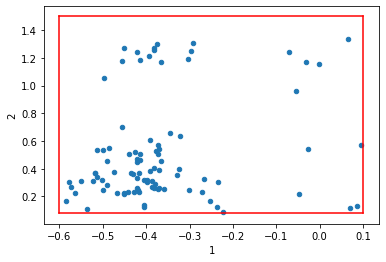

areas: -0.9939999999999999


In [172]:
cut=0
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .1
Y_cut_min = .08
#rotation_correction_points(Z_points)
Z_points.plot.scatter(x=1, y=2)
#plt.plot(rot_position_data[1],rot_position_data[3])
plt.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.plot()
plt.savefig('%srears_cut.png' %(figures), dpi = 200) 
plt.show()
print ('areas: %s' %((X_cut_min-X_cut_max)*(Y_cut_max-Y_cut_min))) 


### Now with beacons as well 

In [174]:
FS03_beacon.head()

0         1         2         3         4         5
0  1.615567e+09 -0.403393  0.693360  0.303913 -0.177449 -0.524226
1  1.615567e+09 -0.477360  0.688804  0.285716 -0.177449 -0.524226
2  1.615567e+09 -0.485838  0.659638  0.339475 -0.177449 -0.524226
3  1.615567e+09 -0.435682  0.698668  0.326234 -0.177449 -0.524226
4  1.615567e+09 -0.432287  0.722603  0.291199 -0.177449 -0.524226

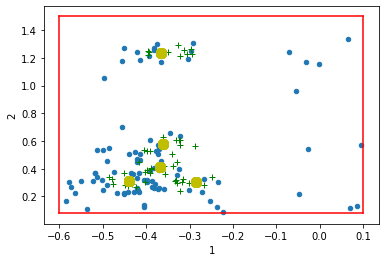

areas: -0.9939999999999999


In [238]:
cut=0
rot_position_data=pd.DataFrame()
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .1
Y_cut_min = .08
#rotation_correction_points(Z_points)
#plt.gca(aspect='equal')
Z_points.plot.scatter(x=1, y=2)
#plt.plot(rot_position_data[1],rot_position_data[3])
plt.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.plot(FS03_beacon[1],FS03_beacon[3],'g+')
alpha = (2) * np.pi / 180
rot_position_data[1] = FS03_beacon[4] * np.cos(alpha) - FS03_beacon[5] * np.sin(alpha)
rot_position_data[2] = FS03_beacon[4] * np.sin(alpha) + FS03_beacon[5] * np.cos(alpha)
plt.plot(rot_position_data[1]+x_offset,rot_position_data[2]-y_offset,'yo',ms=10)
#FS03_beacon.plot.scatter(x=4, y=5)
plt.savefig('%srears_cut_beacon.png' %(figures), dpi = 200) 
plt.show()
print ('areas: %s' %((X_cut_min-X_cut_max)*(Y_cut_max-Y_cut_min)))

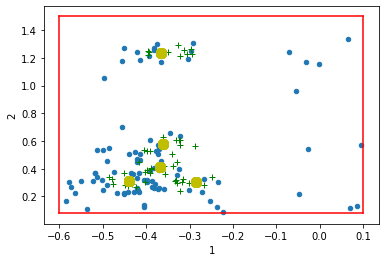

areas: -0.9939999999999999


In [241]:

cut=0
rot_position_data=pd.DataFrame()
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .1
Y_cut_min = .08
#rotation_correction_points(Z_points)
#plt.gca(aspect='equal')
Z_points.plot.scatter(x=1, y=2)
#plt.plot(rot_position_data[1],rot_position_data[3])
plt.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.plot(FS03_beacon[1],FS03_beacon[3],'g+')
alpha = (2) * np.pi / 180
rot_position_data[1] = FS03_beacon[4] * np.cos(alpha) - FS03_beacon[5] * np.sin(alpha)
rot_position_data[2] = FS03_beacon[4] * np.sin(alpha) + FS03_beacon[5] * np.cos(alpha)
plt.plot(rot_position_data[1]+x_offset,rot_position_data[2]-y_offset,'yo',ms=10)
#FS03_beacon.plot.scatter(x=4, y=5)
plt.savefig('%srears_cut_beacon.png' %(figures), dpi = 200) 
plt.show()
print ('areas: %s' %((X_cut_min-X_cut_max)*(Y_cut_max-Y_cut_min)))


#### Also need to figure out by how much I will cut on the arena. 

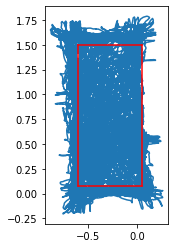

array([ 0.        ,  2.        , 57.14285714])

In [194]:
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .05
Y_cut_min = .08

def Borderless_histogram (position_data,beacon_data,cut=0,seconds_back = 3 ):
    
    rot_position_data =  rotation_correction(position_data)
    
    norm_x,norm_y,norm_time = position_before_beacon_trigger_beacon(seconds_back, beacon_data, rot_position_data)

    
    plt.plot(rot_position_data[1],rot_position_data[3])
    plt.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
    plt.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
    plt.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
    plt.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
    plt.gca().set_aspect('equal')
    plt.show()
    
    count=0
    for i in np.arange(len(norm_x)):
        if max(norm_y[i])<(Y_cut_max-cut) and max(norm_x[i])<(X_cut_max-cut)and min(norm_y[i])>(Y_cut_min+cut)and min(norm_x[i])>(X_cut_min+cut):
            count +=1
    percentage = count/len(norm_x)*100
    return (cut,seconds_back,percentage)
np.asarray(Borderless_histogram(FS03_position,FS03_beacon,cut=0,seconds_back=2))

(array([  82.,  101.,  331., 1126., 2541., 4441., 6279., 6643., 5730.,
        5820., 5554., 5832., 6776., 5144., 5685., 3617., 3681., 3339.,
        3278., 4930., 4445., 3912., 5242., 6307., 4643., 2281.,  817.,
         326.,  157.,   87.]),
 array([-0.8775586 , -0.83977705, -0.8019955 , -0.76421396, -0.72643241,
        -0.68865086, -0.65086931, -0.61308776, -0.57530621, -0.53752466,
        -0.49974312, -0.46196157, -0.42418002, -0.38639847, -0.34861692,
        -0.31083537, -0.27305382, -0.23527227, -0.19749073, -0.15970918,
        -0.12192763, -0.08414608, -0.04636453, -0.00858298,  0.02919857,
         0.06698011,  0.10476166,  0.14254321,  0.18032476,  0.21810631,
         0.25588786]),
 <a list of 30 Patch objects>)

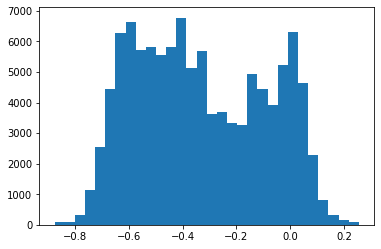

In [201]:

plt.hist(FS03_position[1], 30)

(array([ 281.,  675., 3147., 6203., 3587., 3659., 6334., 5736., 4925.,
        3666., 5522., 4600., 5475., 3761., 3085., 2985., 3163., 3262.,
        3086., 2658., 4492., 3688., 2509., 3233., 2388., 3630., 6543.,
        5259., 1332.,  263.]),
 array([-0.20578095, -0.13932636, -0.07287176, -0.00641717,  0.06003743,
         0.12649202,  0.19294661,  0.25940121,  0.3258558 ,  0.3923104 ,
         0.45876499,  0.52521958,  0.59167418,  0.65812877,  0.72458337,
         0.79103796,  0.85749256,  0.92394715,  0.99040174,  1.05685634,
         1.12331093,  1.18976553,  1.25622012,  1.32267471,  1.38912931,
         1.4555839 ,  1.5220385 ,  1.58849309,  1.65494769,  1.72140228,
         1.78785687]),
 <a list of 30 Patch objects>)

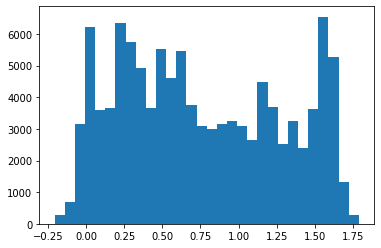

In [205]:
plt.hist(FS03_position[3], 30)


In [234]:
x_max, x_min = 0.2, -0.76
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 0.072,  -1.754
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.27999999999999997 -0.8410000000000001


## Plotting trajectories subtracted form the beacon 

In [ ]:
circle=.075
result_DF=[]
t=0
loop= 0
for time in FS6_positions[0]:
    if time>FS6_beacons[0][t]:
        t+=6
        
    if t > (FS6_beacons.size/6)-1:
        print("large")
        break
    else:
        cylinder_position = FS6_beacons[4][t], FS6_beacons[5][t]
        rat_position = FS6_positions[1][loop],FS6_positions[3][loop]
        diff_position = np.array(rat_position) - np.array(cylinder_position)
        distance = linalg.norm(diff_position)
        #print(distance)
        if distance < circle:
            result_DF.append((FS6_positions[0][loop],FS6_positions[1][loop],FS6_positions[3][loop],FS6_positions[2][loop])) 
        else:
            result_DF.append((FS6_positions[0][loop],'NaN','NaN','NaN'))
    loop +=1